# **TRABALHO DE EXTENSÃO - *Introdução à Inferência Estatística***




---



Alunos:

Victor Silva Botelho - 15645421

Thiago Pasquotto Tavares - 15490194

Arthur Filliettaz Mendes - 12532055

# ***Coronary Heart Disease Prediction by Demographic, Behavioral and Medical Risk Factors***

DataSet deste Notebook:
https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression/data

# ***OBJETIVOS DESTE ESTUDO***

Temos como objetivo identificar os fatores de risco mais relevantes para doenças cardíacas coronarianas, bem como prever o risco global de doença do coração.

Descobrir se fatores como nível de glicose, nível de colesterol, se é fumante, idade e sexo afetam diretamente o risco de doença cardíaca nos próximos 10 anos de vida do paciente.

E para isso, usaremos técnicas e métodos da ***Inferência Estatística***.

# ***1. IMPORTAÇÃO DAS BIBLIOTECAS***

In [42]:
# ------------------
# 1. Importação de bibliotecas
# ------------------
import kagglehub
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency, stats, kruskal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

#***2. CARREGAMENTO DOS DADOS***

In [43]:
# ------------------
# 2. Carregamento dos dados
# ------------------
path = kagglehub.dataset_download("dileep070/heart-disease-prediction-using-logistic-regression")
df = pd.read_csv(path + "/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [44]:
print("Número de linhas e colunas no nosso dataset:\n")
print(df.shape)

print("\nColunas do nosso dataset:\n")
print(df.info())

Número de linhas e colunas no nosso dataset:

(4238, 16)

Colunas do nosso dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238

In [45]:
# Renomeando algumas colunas para facilitar a leitura

df = df.rename(columns={
    'male': 'sexo',
    'age': 'idade',
    'education': 'escolaridade',
    'currentSmoker': 'fumante_atual',
    'cigsPerDay': 'cigarros_por_dia',
    'BPMeds': 'medicacao_pressao',
    'prevalentStroke': 'ja_teve_AVC',
    'prevalentHyp': 'possui_hipertensao',
    'totChol': 'colesterol_total',
    'sysBP': 'pressao_sistolica',
    'diaBP': 'pressao_diastolica',
    'BMI': 'IMC',
    'heartRate': 'frequencia_cardiaca',
    'glucose': 'glicose',
    'TenYearCHD': 'risco_CHD_10anos'
})

print("\nApós a renomeação, abaixo está a descrição de cada coluna, com seus quartis, valores máximo e mínimo, média e desvio padrão:\n")
print(df.describe())



Após a renomeação, abaixo está a descrição de cada coluna, com seus quartis, valores máximo e mínimo, média e desvio padrão:

              sexo        idade  escolaridade  fumante_atual  \
count  4238.000000  4238.000000   4133.000000    4238.000000   
mean      0.429212    49.584946      1.978950       0.494101   
std       0.495022     8.572160      1.019791       0.500024   
min       0.000000    32.000000      1.000000       0.000000   
25%       0.000000    42.000000      1.000000       0.000000   
50%       0.000000    49.000000      2.000000       0.000000   
75%       1.000000    56.000000      3.000000       1.000000   
max       1.000000    70.000000      4.000000       1.000000   

       cigarros_por_dia  medicacao_pressao  ja_teve_AVC  possui_hipertensao  \
count       4209.000000        4185.000000  4238.000000         4238.000000   
mean           9.003089           0.029630     0.005899            0.310524   
std           11.920094           0.169584     0.076587    

#***3. ANÁLISE EXPLORATÓRIA***

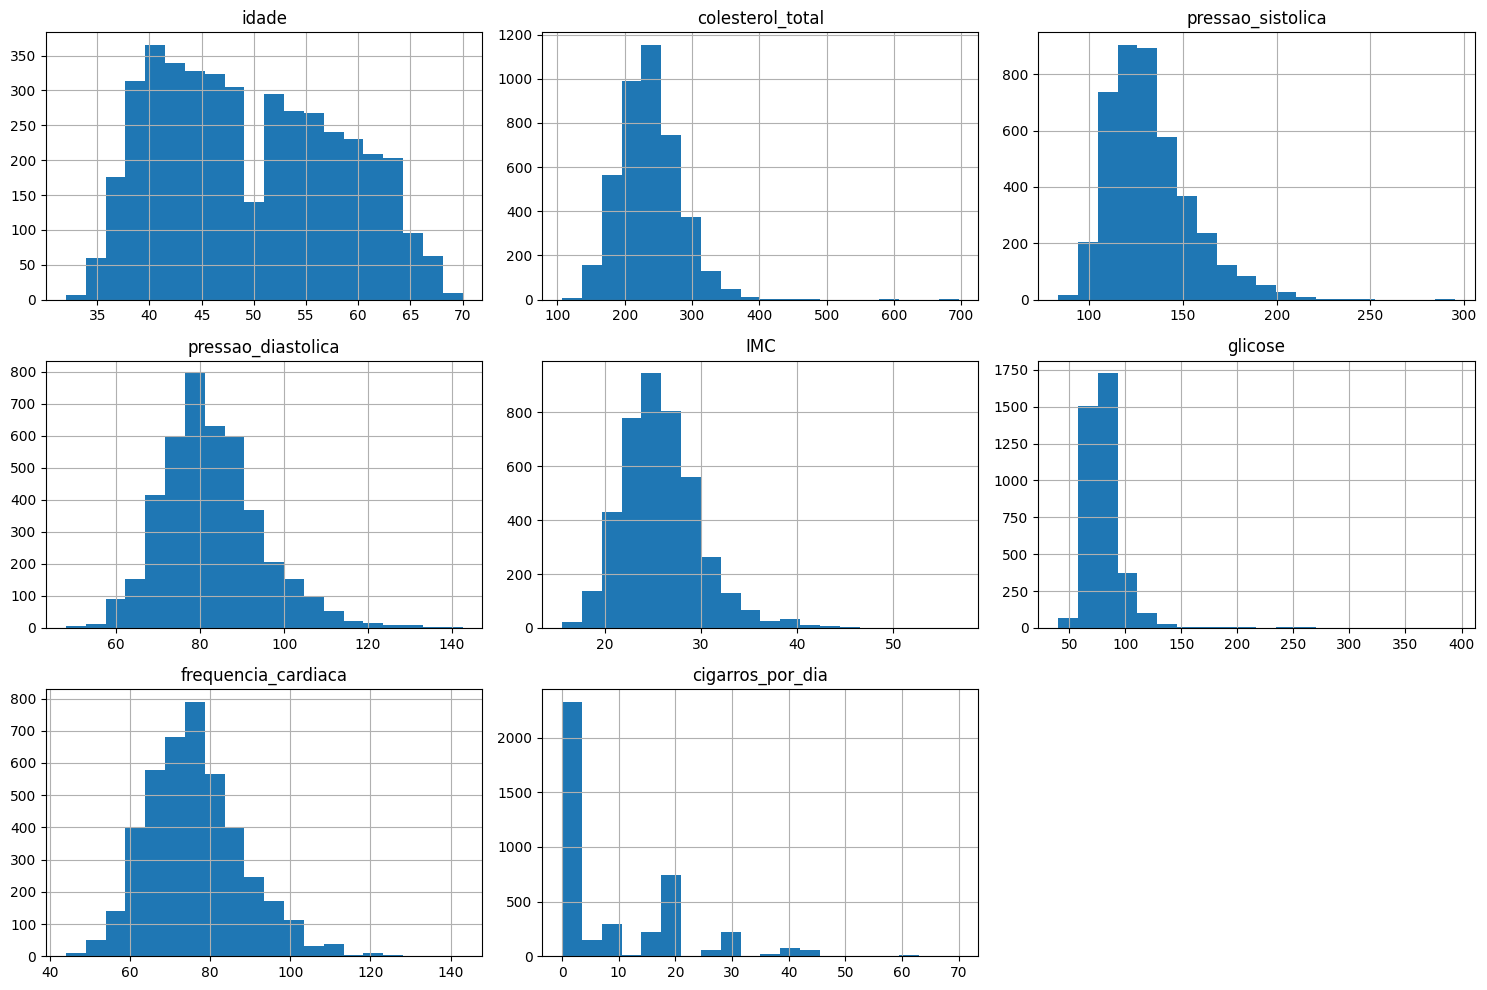

In [46]:
# ------------------
# 3. Análise Exploratória
# ------------------

# Avaliando a distribuição das variáveis numéricas

variaveis_numericas = ['idade', 'colesterol_total', 'pressao_sistolica', 'pressao_diastolica', 'IMC', 'glicose', 'frequencia_cardiaca', 'cigarros_por_dia']
df[variaveis_numericas].hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()


# ***3.1 GRÁFICOS***

Gráfico 1 : Visualização por HeatMap de Matriz de Correlação entre 2 variáveis quantitativas



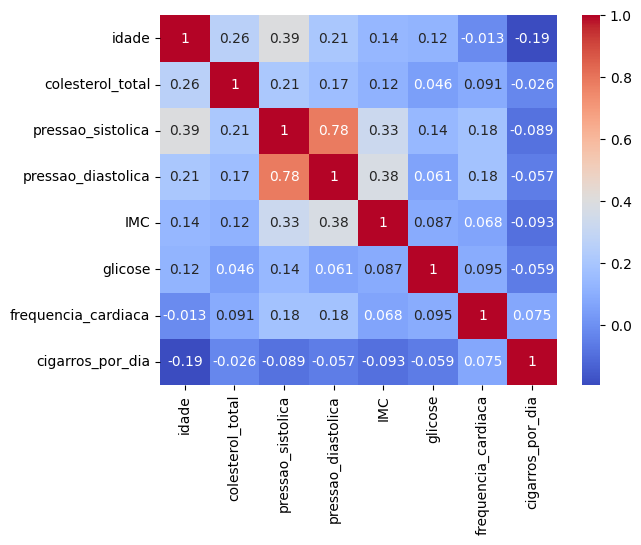

In [47]:
# Gráfico 1 : (HeatMap) Visualização por HeatMap de Matriz de Correlação entre 2 variáveis quantitativas

print("Gráfico 1 : Visualização por HeatMap de Matriz de Correlação entre 2 variáveis quantitativas\n")

matriz_correlacao = df[variaveis_numericas].corr()
sns.heatmap(matriz_correlacao, annot = True, cmap = 'coolwarm')
plt.show()

# Nesse Heatmap, valores positivos (tom avermelhado escuro) indicam correlação positiva (quando uma sobe, a outra também sobe),
# enquanto valores negativos (tom azulado escuro) indicam correlação negativa (quando uma sobe, a outra desce).
# Valores bem próximos de 0 (tons claros) indicam uma correlação fraca.


***A visualização por Heatmap da matriz de correlação no Gráfico 1 mostrou que as variáveis "pressao_sistolica" e "pressao_diastolica" apresentam forte correlação positiva (r = 0.78), o que era esperado pois há uma correlação biológica. Observou-se ainda que a idade se correlaciona positivamente com a pressão sistólica (r = 0.39) e o colesterol total (r = 0.26), sugerindo aumento desses fatores com o envelhecimento. A maioria das correlações entre outras variáveis foi fraca, o que é comum em dados clínicos multivariados.***

Gráfico 2 : Sexo × Cigarros por dia



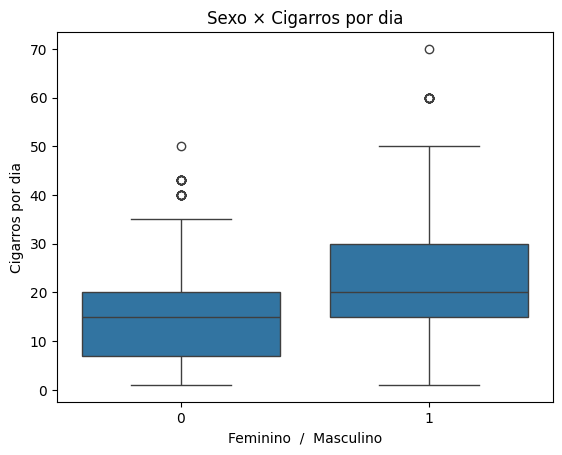

In [48]:
# Gráfico 2 : (Boxplot) Sexo × Cigarros por dia

print("Gráfico 2 : Sexo × Cigarros por dia\n")

sns.boxplot(x='sexo', y='cigarros_por_dia', data=df[df['cigarros_por_dia'] > 0])
plt.title('Sexo × Cigarros por dia')
plt.xlabel('Feminino  /  Masculino')
plt.ylabel('Cigarros por dia')
plt.show()


***Do Gráfico 2 é possível concluir que, dependendo do sexo, há uma diferença visível na quantidade de cigarros fumados por dia, demonstrando que os entrevistados do sexo masculino tem tendência a fumar maiores quantidades de cigarro do que aquelas do sexo feminino.***

Gráfico 3 : Escolaridade × IMC



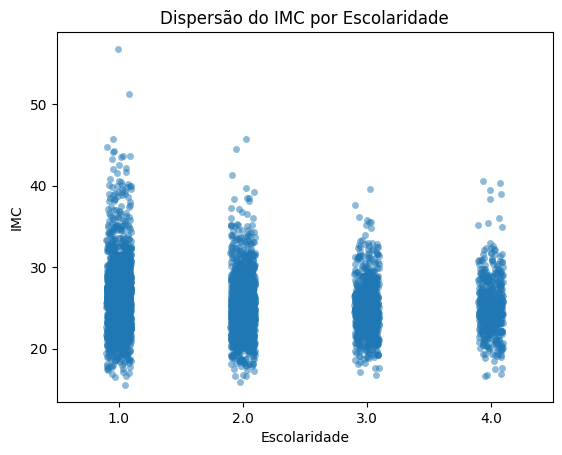

In [49]:
# Gráfico 3: (Stripplot) Escolaridade × IMC

print("Gráfico 3 : Escolaridade × IMC\n")

sns.stripplot(x='escolaridade', y='IMC', data=df, jitter=True, alpha=0.5)
plt.title('Dispersão do IMC por Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('IMC')
plt.show()


***O Gráfico 3 revela que, para indivíduos da amostra com escolaridade menor, nota-se certa tendência de valores de IMC bastante dispersos, com valores altos e baixos, e uma quantidade mmaior de pessoas com IMC elevado quando comparado com os outros níveis de escolaridade. À medida que a escolaridade aumenta, percebe-se que menos indivíduos possuem valores elevados ou reduzidos de IMC, concentrando-se em torno de uma média de IMC = 25.***

Gráfico 4 : Faixa etária × Colesterol



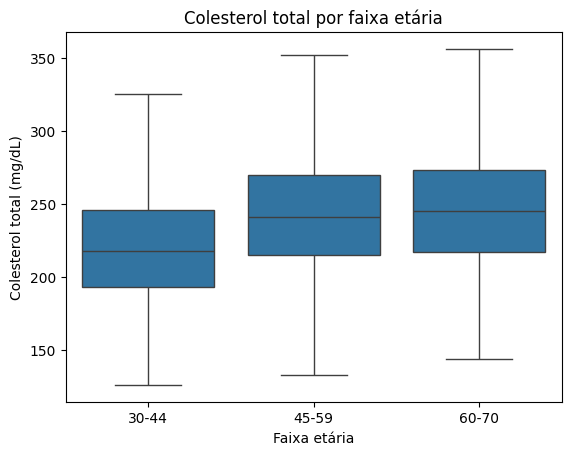

In [50]:
# Gráfico 4 : (Boxplot) Faixa etária × Colesterol

print("Gráfico 4 : Faixa etária × Colesterol\n")

df['faixa_idade'] = pd.cut(df['idade'], bins=[30, 45, 60, 70], labels=['30-44', '45-59', '60-70']) # Criar faixa etária agrupada para melhor visualização

sns.boxplot(x='faixa_idade', y='colesterol_total', data=df, showfliers=False)
plt.title('Colesterol total por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Colesterol total (mg/dL)')
plt.show()


***Do gráfico 4 nota-se que, com o envelhecimento, há certa tendência de aumento do colesterol total dos entrevistados, com uma diferença maior entre as faixas etárias 30 a 44 anos e 45 a 59 anos. A partir dos 45 anos de idade, percebe-se uma estabilização no nível do colesterol total para pessoas de até 70 anos.***

Gráfico 5 : Faixa etária × Risco de Doença Coronariana



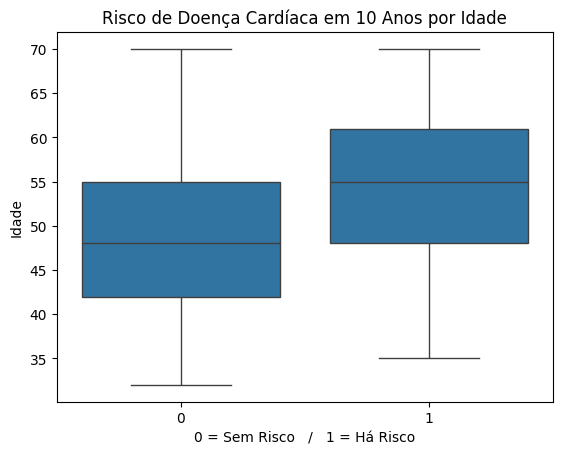

In [51]:
# Gráfico 5 : (Boxplot) Faixa etária × Risco de Doença Coronariana

print("Gráfico 5 : Faixa etária × Risco de Doença Coronariana\n")

sns.boxplot(x='risco_CHD_10anos', y='idade', data=df)
plt.title("Risco de Doença Cardíaca em 10 Anos por Idade")
plt.xlabel("0 = Sem Risco   /   1 = Há Risco")
plt.ylabel("Idade")
plt.show()


***O Gráfico 5 revela que a faixa etária das pessoas com risco de CHD é visivelmente superior àquelas sem risco. A mediana de idade no grupo com risco é mais alta, e os quartis também estão deslocados para cima, indicando que o risco de doença coronariana em 10 anos tende a aumentar com a idade.***

Gráfico 6 : Quantidade de pessoas com risco de CHD por hábito de fumar



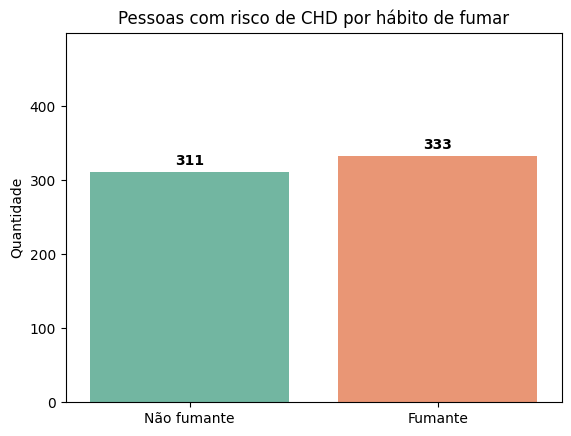

In [52]:
# Gráfico 6 : (Barplot) Quantidade de pessoas com risco de CHD por hábito de fumar

print("Gráfico 6 : Quantidade de pessoas com risco de CHD por hábito de fumar\n")

# Filtra apenas os que têm risco de doença cardíaca
df_risco = df[df['risco_CHD_10anos'] == 1]

# Conta quantos com risco são fumantes e quantos não são
contagem = df_risco['fumante_atual'].value_counts().sort_index()

# Renomeia para rótulo mais legível
contagem.index = ['Não fumante', 'Fumante']

# Gráfico
ax = sns.barplot(x=contagem.index, y=contagem.values, palette='Set2')

# Adiciona os valores no topo das barras
for i, v in enumerate(contagem.values):
    ax.text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.title('Pessoas com risco de CHD por hábito de fumar')
plt.ylabel('Quantidade')
plt.xlabel('')
plt.ylim(0, max(contagem.values) * 1.5)
plt.show()


***O Gráfico 6 mostra que, entre os indivíduos com risco de CHD, a quantidade de fumantes é levemente superior à de não fumantes (333 contra 311). Apesar da diferença numérica modesta, a proximidade entre os valores sugere que, neste conjunto de dados, o hábito de fumar não se destaca como um fator fortemente discriminante entre os grupos com risco. Essa percepção é coerente com o resultado estatístico do teste Qui-Quadrado mais à frente, que não indicou associação significativa entre tabagismo atual e risco de CHD.***

# ***3.2 CONTAGEM***

In [53]:
# Contagem 1 : variável "possui_hipertensao"

contagem = df_risco['possui_hipertensao'].value_counts().sort_index()
contagem.index = ['Sem hipertensão', 'Com hipertensão']

contagem_df = contagem.to_frame(name='Quantidade')
display(contagem_df.style.set_caption("Distribuição de Hipertensão entre pessoas com risco de CHD"))

total = contagem.sum()
porcent_hipertensao = (contagem[1] / total) * 100
print(f"\nPorcentagem de pessoas com hipertensão com risco de CHD em relação ao total: {porcent_hipertensao:.2f}%")


,Quantidade
Sem hipertensão,319
Com hipertensão,325



Porcentagem de pessoas com hipertensão com risco de CHD em relação ao total: 50.47%


In [54]:
# Contagem 2 : variável "diabetes"

contagem = df_risco['diabetes'].value_counts().sort_index()
contagem.index = ['Sem diabetes', 'Com diabetes']

contagem_df = contagem.to_frame(name='Quantidade')
display(contagem_df.style.set_caption("Distribuição de diabetes entre pessoas com risco de CHD"))

total = contagem.sum()
porcent_diabetes = (contagem[1] / total) * 100
print(f"\nPorcentagem de pessoas com diabetes com risco de CHD em relação ao total: {porcent_diabetes:.2f}%")


,Quantidade
Sem diabetes,604
Com diabetes,40



Porcentagem de pessoas com diabetes com risco de CHD em relação ao total: 6.21%


In [55]:
# Contagem 3 : variável "ja_teve_AVC"

contagem = df_risco['ja_teve_AVC'].value_counts().sort_index()
contagem.index = ['Não teve AVC ', 'Já teve AVC']
contagem

contagem_df = contagem.to_frame(name='Quantidade')
display(contagem_df.style.set_caption("Distribuição de AVC entre pessoas com risco de CHD"))

total = contagem.sum()
porcent_avc = (contagem[1] / total) * 100
print(f"\nPorcentagem de pessoas com risco de CHD que já tiveram AVC em relação ao total: {porcent_avc:.2f}%")


,Quantidade
Não teve AVC,633
Já teve AVC,11



Porcentagem de pessoas com risco de CHD que já tiveram AVC em relação ao total: 1.71%


***As contagens indicam que cerca de metade dos indivíduos com risco de CHD possuem hipertensão, enquanto a presença de diabetes e histórico de AVC é menos frequente — representando, respectivamente, 6,21% e 1,71% da amostra. Ainda que menos prevalentes, diabetes e AVC continuam sendo condições clinicamente relevantes e potencialmente associadas ao risco cardiovascular, justificando sua consideração nas análises inferenciais subsequentes.***

#***4. TESTES DE NORMALIDADE***


--- Resultados do Teste de Shapiro-Wilk ---



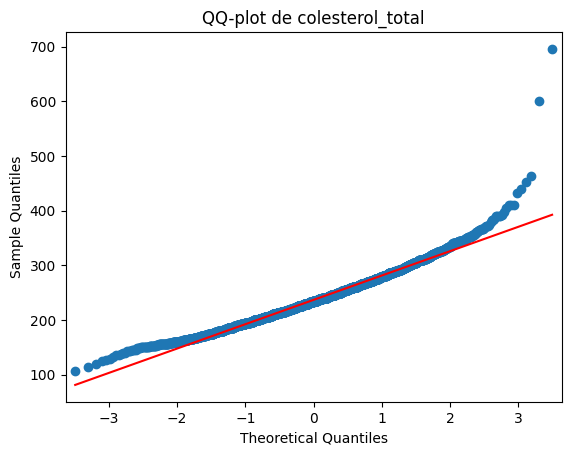

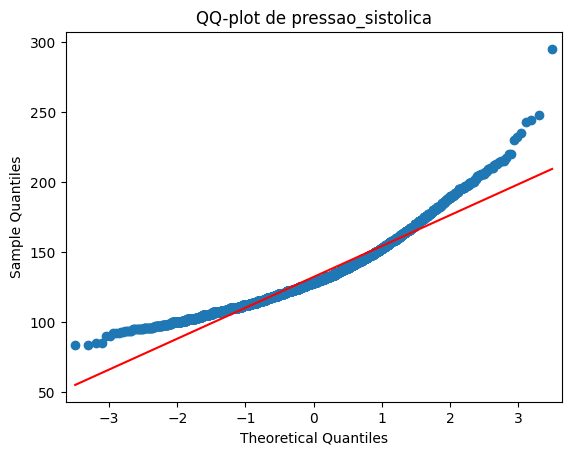

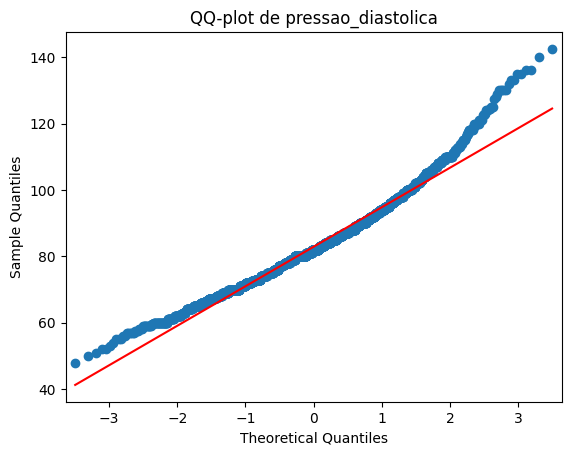

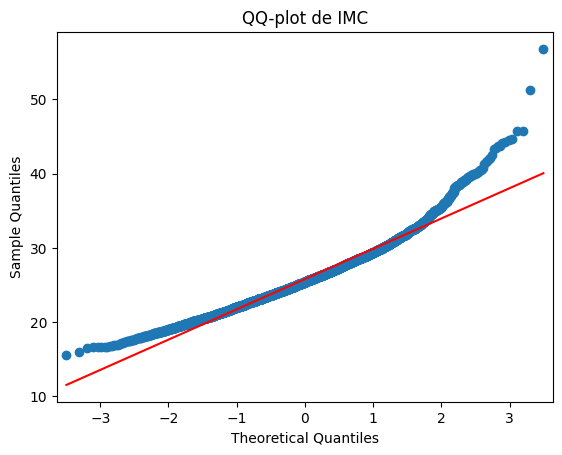

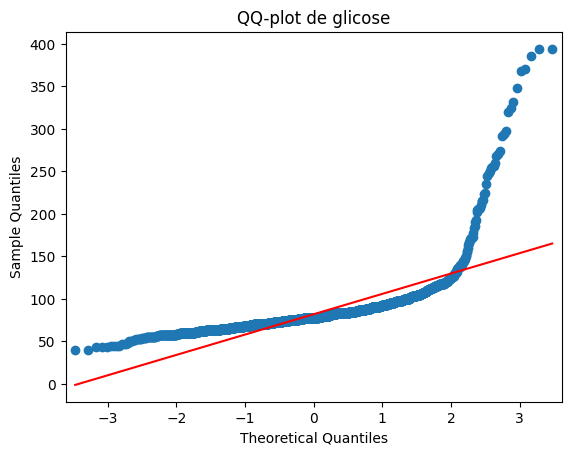

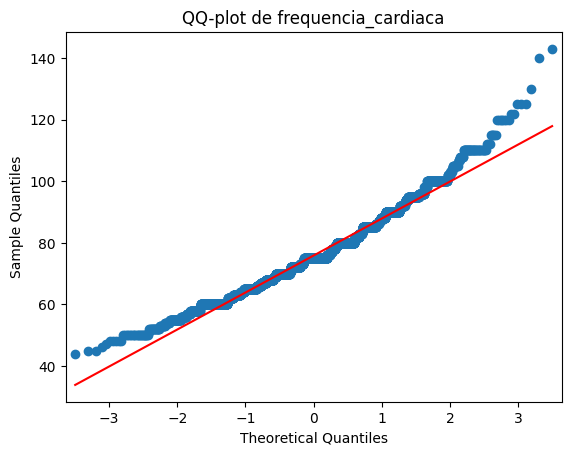



Resumo dos testes de normalidade:
colesterol_total          | p = 0.00000 | Não normal
pressao_sistolica         | p = 0.00000 | Não normal
pressao_diastolica        | p = 0.00000 | Não normal
IMC                       | p = 0.00000 | Não normal
glicose                   | p = 0.00000 | Não normal
frequencia_cardiaca       | p = 0.00000 | Não normal


In [56]:
# ------------------
# 4. Testes de Normalidade
# ------------------

variaveis_quant_cont = ['colesterol_total', 'pressao_sistolica', 'pressao_diastolica', 'IMC', 'glicose', 'frequencia_cardiaca'] # Selecionando apenas as variáveis quantitativas contínuas

print("\n--- Resultados do Teste de Shapiro-Wilk ---\n")
for col in variaveis_quant_cont:
    stat, p = shapiro(df[col].dropna())

# QQ-plots
for col in variaveis_quant_cont:
    sm.qqplot(df[col].dropna(), line='s')
    plt.title(f"QQ-plot de {col}")
    plt.show()
    print("\n")

print("Resumo dos testes de normalidade:")
for col in variaveis_quant_cont:
    stat, p = shapiro(df[col].dropna())
    resultado = "Normal" if p > 0.05 else "Não normal"
    print(f"{col:<25} | p = {p:.5f} | {resultado}")


***Após análise do p valor do teste de Shapiro-Wilk indicar desvio da normalidade e os pontos nos QQ-plots visualmente não seguirem a linha de referência (assimetria), é possível concluir que as distribuições das variáveis não podem ser aproximadas para uma distribuição normal, descartando o estudo com testes paramétricos.***

#***5. TESTE NÃO-PARAMÉTRICO 1 : Teste U de Mann-Whitney***

In [57]:
# ------------------
# 5. Teste U de Mann-Whitney
# ------------------

# Nesse teste, vamos comparar as medianas de duas amostras independentes.
# É o equivalente não paramétrico do teste t para amostras independentes.

variaveis_quant_cont = ['colesterol_total', 'pressao_sistolica', 'pressao_diastolica',
                        'IMC', 'glicose', 'frequencia_cardiaca']

alpha = 0.05  # Nível de significância

print("\n--- Resultados do Teste de Mann-Whitney U para variáveis contínuas (sem normalidade) ---")

for var in variaveis_quant_cont:
    grupo_0 = df[df['risco_CHD_10anos'] == 0][var].dropna()
    grupo_1 = df[df['risco_CHD_10anos'] == 1][var].dropna()

    if len(grupo_0) < 2 or len(grupo_1) < 2:
        print(f"\nVariável: {var} — dados insuficientes.")
        continue

    stat, p = mannwhitneyu(grupo_0, grupo_1, alternative='two-sided')

    print(f"\nVariável: {var}")
    print(f"Estatística U: {stat:.4f}")
    print(f"P valor: {p:.8f}")

    if p < alpha:
      print("✅ Diferença estatisticamente significativa entre os grupos.")
    else:
      print("❌ Não há diferença estatisticamente significativa entre os grupos.")



--- Resultados do Teste de Mann-Whitney U para variáveis contínuas (sem normalidade) ---

Variável: colesterol_total
Estatística U: 983199.5000
P valor: 0.00000024
✅ Diferença estatisticamente significativa entre os grupos.

Variável: pressao_sistolica
Estatística U: 795293.5000
P valor: 0.00000000
✅ Diferença estatisticamente significativa entre os grupos.

Variável: pressao_diastolica
Estatística U: 912203.0000
P valor: 0.00000000
✅ Diferença estatisticamente significativa entre os grupos.

Variável: IMC
Estatística U: 1001357.0000
P valor: 0.00000177
✅ Diferença estatisticamente significativa entre os grupos.

Variável: glicose
Estatística U: 883093.0000
P valor: 0.00074990
✅ Diferença estatisticamente significativa entre os grupos.

Variável: frequencia_cardiaca
Estatística U: 1122033.5000
P valor: 0.24083133
❌ Não há diferença estatisticamente significativa entre os grupos.


***Dado que as variáveis analisadas não seguem distribuição normal (verificado pelos testes de Shapiro-Wilk e pelos QQ-plots), foi aplicado o teste de Mann-Whitney para comparar as distribuições entre os grupos com e sem risco de CHD. Os resultados revelaram que algumas variáveis, como IMC e Glicose, apresentaram diferenças estatisticamente significativas entre os grupos, e a frequência cardíaca foi a única, das variáveis utilizadas no teste, que não mostrou diferença estatisticamente significativa.***

#***6. TESTE NÃO-PARAMÉTRICO 2 : Kruskal-Wallis***

In [58]:
# ------------------
# 6. Teste de Kruskal-Wallis
# ------------------

# Nesse teste de Kruskal-Wallis vamos comparar três ou mais amostras independentes, que é uma generalização do Mann-Whitney para mais de 2 grupos.
# Como se trata de uma variável categórica com mais de dois grupos, o teste é apropriado. Vamos estudar 4 casos:
# Caso 1: Colesterol por Escolaridade
# Caso 2: Pressão sistólica por faixa etária
# Caso 3: Glicose por número de fatores de risco (diabetes, hipertensão, fumante)
# Caso 4: Colesterol total por faixa etária

alpha = 0.05  # Nível de significância

print("\n--- Resultados do Teste de Kruskal-Wallis para múltiplas comparações com mais de dois grupos ---\n")

# Exemplo 1: Colesterol por Escolaridade
print("\n1️⃣ Colesterol total por nível de escolaridade\n")
grupos_esc = sorted(df['escolaridade'].dropna().unique())
dados_esc = [df[df['escolaridade'] == esc]['colesterol_total'].dropna() for esc in grupos_esc]
stat, p = kruskal(*dados_esc)
print(f"Estatística H: {stat:.4f} | p-valor: {p:.4f}")
print("✅ Diferença estatisticamente significativa" if p < alpha else "❌ Não há diferença estatisticamente significativa")
print("\n---------------------------------------------------")

# Exemplo 2: Pressão sistólica por faixa etária
print("\n2️⃣ Pressão sistólica por faixa etária\n")

df['faixa_idade'] = pd.cut(df['idade'], bins=[30, 45, 60, 70], labels=['30-44', '45-59', '60-70'])

grupos_faixa = df['faixa_idade'].dropna().unique().sort_values()
dados_faixa = [df[df['faixa_idade'] == faixa]['pressao_sistolica'].dropna() for faixa in grupos_faixa]
stat, p = kruskal(*dados_faixa)
print(f"Estatística H: {stat:.4f} | p-valor: {p:.4f}")
print("✅ Diferença estatisticamente significativa" if p < alpha else "❌ Não há diferença estatisticamente significativa")
print("\n---------------------------------------------------")

# Exemplo 3: Glicose por número de fatores de risco (diabetes, hipertensão, fumante)
print("\n3️⃣ Glicose por número de fatores de risco\n")

df['fatores_risco'] = df[['diabetes', 'possui_hipertensao', 'fumante_atual']].sum(axis=1)
df['grupo_fatores'] = pd.cut(df['fatores_risco'], bins=[-1, 0, 1, 3], labels=['0 fatores', '1 fator', '2 ou mais'])

grupos_fatores = df['grupo_fatores'].dropna().unique().sort_values()
dados_fatores = [df[df['grupo_fatores'] == g]['glicose'].dropna() for g in grupos_fatores]
stat, p = kruskal(*dados_fatores)
print(f"Estatística H: {stat:.4f} | p-valor: {p:.4f}")
print("✅ Diferença estatisticamente significativa" if p < alpha else "❌ Não há diferença estatisticamente significativa")
print("\n---------------------------------------------------")

# Exemplo 4: Colesterol total por faixa etária
print("\n4️⃣ Colesterol total por faixa etária\n")

dados_faixa_colesterol = [df[df['faixa_idade'] == faixa]['colesterol_total'].dropna() for faixa in grupos_faixa]
stat, p = kruskal(*dados_faixa_colesterol)
print(f"Estatística H: {stat:.4f} | p-valor: {p:.4f}")
print("✅ Diferença estatisticamente significativa\n" if p < alpha else "❌ Não há diferença estatisticamente significativa")



--- Resultados do Teste de Kruskal-Wallis para múltiplas comparações com mais de dois grupos ---


1️⃣ Colesterol total por nível de escolaridade

Estatística H: 6.4762 | p-valor: 0.0906
❌ Não há diferença estatisticamente significativa

---------------------------------------------------

2️⃣ Pressão sistólica por faixa etária

Estatística H: 532.1369 | p-valor: 0.0000
✅ Diferença estatisticamente significativa

---------------------------------------------------

3️⃣ Glicose por número de fatores de risco

Estatística H: 18.4365 | p-valor: 0.0001
✅ Diferença estatisticamente significativa

---------------------------------------------------

4️⃣ Colesterol total por faixa etária

Estatística H: 313.5248 | p-valor: 0.0000
✅ Diferença estatisticamente significativa



***Com base nos resultados do teste de Kruskal-Wallis, observou-se que há diferenças estatisticamente significativas na distribuição dos valores de pressão sistólica, glicose e colesterol total entre os diferentes grupos analisados. Especificamente, a pressão sistólica e o colesterol apresentaram variações importantes entre as faixas etárias, indicando que esses fatores tendem a se elevar com o envelhecimento.***

***Além disso, os níveis de glicose aumentaram proporcionalmente ao número de fatores de risco (como diabetes, hipertensão e tabagismo), reforçando sua relevância como indicador de risco cardiovascular.***

***Por outro lado, não foi identificada diferença estatisticamente significativa nos níveis de colesterol total entre os grupos de escolaridade, sugerindo que, nesta amostra, o nível educacional não apresentou associação clara com o colesterol. Esses achados complementam as análises anteriores, destacando as variáveis que se comportam de forma diferenciada conforme subgrupos clínicos e demográficos.***

#***7. TESTE QUI-QUADRADO PARA VARIÁVEIS CATEGÓRICAS***

In [61]:
# ------------------
# 7. Teste Qui-Quadrado de Independência
# ------------------

# No teste Qui-Quadrado de independência vamos descobrir se existe associação entre 2 variáveis categóricas.

# Vamos verificar se as frequências observadas em uma tabela de contingência são diferentes das frequências esperadas caso as variáveis fossem independentes.


alpha = 0.05  # Nível de significância

print("\n--- Resultados do Teste Qui-Quadrado para variáveis categóricas ---\n")

variaveis_categoricas = ['sexo', 'fumante_atual', 'diabetes', 'possui_hipertensao'] # selecionando as variáveis categóricas

for var in variaveis_categoricas:
    # Tabela de contingência entre a variável categórica e o risco de CHD
    tabela = pd.crosstab(df[var], df['risco_CHD_10anos'])

    # Aplica o teste Qui-Quadrado
    stat, p, dof, expected = chi2_contingency(tabela) # valor da estatística Qui-Quadrado, p-valor, graus de liberdade e valores esperados

    # Renomeia os índices e colunas da tabela para melhor leitura
    tabela.index = [f'{var} = {val}' for val in tabela.index]
    tabela.columns = ['Sem CHD', 'Com CHD']

    # Tabela estilizada com título
    display(tabela.style.set_caption(f"{var} vs risco_CHD_10anos"))

    print(f"\nEstatística Qui-Quadrado: {stat:.4f}")
    print(f"p-valor: {p:.4f}")

    if p < alpha:
        print("✅ *Há* associação estatística significativa entre as variáveis.")
    else:
        print("❌ *Nenhuma* associação estatisticamente significativa detectada.")
    print("\n----------------------------------------------------------------\n")



--- Resultados do Teste Qui-Quadrado para variáveis categóricas ---



,Sem CHD,Com CHD
sexo = 0,2118,301
sexo = 1,1476,343



Estatística Qui-Quadrado: 32.6430
p-valor: 0.0000
✅ *Há* associação estatística significativa entre as variáveis.

----------------------------------------------------------------



,Sem CHD,Com CHD
fumante_atual = 0,1833,311
fumante_atual = 1,1761,333



Estatística Qui-Quadrado: 1.4977
p-valor: 0.2210
❌ *Nenhuma* associação estatisticamente significativa detectada.

----------------------------------------------------------------



,Sem CHD,Com CHD
diabetes = 0,3525,604
diabetes = 1,69,40



Estatística Qui-Quadrado: 38.4417
p-valor: 0.0000
✅ *Há* associação estatística significativa entre as variáveis.

----------------------------------------------------------------



,Sem CHD,Com CHD
possui_hipertensao = 0,2603,319
possui_hipertensao = 1,991,325



Estatística Qui-Quadrado: 132.6110
p-valor: 0.0000
✅ *Há* associação estatística significativa entre as variáveis.

----------------------------------------------------------------



***Os testes de Qui-Quadrado realizados entre variáveis categóricas e o risco de doença cardíaca coronariana (CHD) revelaram associações estatisticamente significativas para as variáveis sexo, diabetes e possui_hipertensao, todas com p-valor inferior a 0,05.***

***Esses resultados indicam que homens, pessoas com diabetes e indivíduos hipertensos apresentaram maior proporção de risco de CHD no período analisado.***

***Por outro lado, a variável fumante_atual não apresentou associação estatisticamente significativa com o risco de CHD (p = 0,2210), sugerindo que, neste conjunto de dados, o hábito de fumar atualmente não se destacou como fator associado ao risco cardiovascular, diferentemente do que é frequentemente observado em estudos clínicos.***

***Isso pode indicar uma limitação da amostra ou refletir a influência de outros fatores associados.***

# ***8. CONCLUSÃO***

In [60]:
# ------------------
# 8. Conclusão
# ------------------

# Tabela de resumo dos testes estatísticos aplicados

tabela_resumo = pd.DataFrame({
    'Variável': [
        'Colesterol total', 'Pressão sistólica', 'Pressão diastólica',
        'IMC', 'Glicose', 'Frequência cardíaca',
        'Colesterol x Escolaridade', 'Pressão sistólica x Faixa etária',
        'Glicose x Nº fatores de risco', 'Colesterol x Faixa etária',
        'Sexo', 'Fumante atual', 'Diabetes', 'Hipertensão'
    ],
    'Teste aplicado': [
        'Mann-Whitney', 'Mann-Whitney', 'Mann-Whitney',
        'Mann-Whitney', 'Mann-Whitney', 'Mann-Whitney',
        'Kruskal-Wallis', 'Kruskal-Wallis',
        'Kruskal-Wallis', 'Kruskal-Wallis',
        'Qui-quadrado', 'Qui-quadrado', 'Qui-quadrado', 'Qui-quadrado'
    ],
    'p-valor': [
        '< 0.001', '< 0.001', '< 0.001',
        '< 0.001', '< 0.001', '0.1414',
        '0.0906', '< 0.001',
        '< 0.001', '< 0.001',
        '< 0.001', '0.2210', '< 0.001', '< 0.001'
    ],
    'Significativo?': [
        '✅ Sim', '✅ Sim', '✅ Sim', '✅ Sim', '✅ Sim',
        '❌ Não','❌ Não', '✅ Sim','✅ Sim', '✅ Sim',
        '✅Sim', '❌Não', '✅Sim', '✅Sim'
    ],
    'Interpretação': [
        'CHD apresenta valores mais altos',
        'CHD com valor médio e mediano maior',
        'Diferença de pressão significativa',
        'CHD possui IMC levemente maior',
        'CHD tem glicose mais alta',
        'Sem diferença significativa',
        'Níveis semelhantes entre escolaridades',
        'Pressão aumenta com a idade',
        'Glicose aumenta com mais fatores de risco',
        'Colesterol tende a aumentar com a idade',
        'Homens com maior proporção de CHD',
        'Sem associação estatística clara',
        'Diabetes associado ao risco de CHD',
        'Hipertensão associada ao risco de CHD'
    ]
})

# Exibe a tabela com legenda
tabela_resumo.style.set_caption("Resumo dos Testes Estatísticos Aplicados")


,Variável,Teste aplicado,p-valor,Significativo?,Interpretação
0,Colesterol total,Mann-Whitney,< 0.001,✅ Sim,CHD apresenta valores mais altos
1,Pressão sistólica,Mann-Whitney,< 0.001,✅ Sim,CHD com valor médio e mediano maior
2,Pressão diastólica,Mann-Whitney,< 0.001,✅ Sim,Diferença de pressão significativa
3,IMC,Mann-Whitney,< 0.001,✅ Sim,CHD possui IMC levemente maior
4,Glicose,Mann-Whitney,< 0.001,✅ Sim,CHD tem glicose mais alta
5,Frequência cardíaca,Mann-Whitney,0.1414,❌ Não,Sem diferença significativa
6,Colesterol x Escolaridade,Kruskal-Wallis,0.0906,❌ Não,Níveis semelhantes entre escolaridades
7,Pressão sistólica x Faixa etária,Kruskal-Wallis,< 0.001,✅ Sim,Pressão aumenta com a idade
8,Glicose x Nº fatores de risco,Kruskal-Wallis,< 0.001,✅ Sim,Glicose aumenta com mais fatores de risco
9,Colesterol x Faixa etária,Kruskal-Wallis,< 0.001,✅ Sim,Colesterol tende a aumentar com a idade


***Com base nos testes estatísticos aplicados neste estudo, foi possível identificar fatores significativamente associados ao risco de doença cardíaca coronariana (CHD) nos próximos 10 anos.***

***O teste de Shapiro-Wilk indicou que os dados não seguem distribuição normal, o que justificou a aplicação de testes não-paramétricos, como Mann-Whitney (para comparação entre dois grupos) e Kruskal-Wallis (para três ou mais grupos).***

***Os testes de Mann-Whitney revelaram diferenças estatisticamente significativas para praticamente todas as variáveis analisadas, exceto frequência cardíaca, sugerindo que colesterol, pressão arterial, IMC e glicose estão associados ao risco de CHD.***

***Já os testes de Kruskal-Wallis complementaram essa análise ao mostrar que tanto a pressão sistólica quanto o colesterol variam significativamente entre diferentes faixas etárias, e que os níveis de glicose aumentam com a presença de múltiplos fatores de risco (como diabetes, hipertensão e tabagismo).***

***Variáveis como sexo e diabetes também se mostraram associadas à presença de CHD por meio do teste Qui-Quadrado, enquanto o tabagismo atual não apresentou relação significativa no conjunto de dados analisado.***

***A escolha criteriosa entre testes paramétricos e não paramétricos, bem como a validação dos pressupostos estatísticos, assegurou a confiabilidade dos resultados.***

***Conclui-se, portanto, que a abordagem estatística adotada foi eficaz para identificar os principais fatores associados ao risco cardíaco na base analisada, reforçando a importância de testes inferenciais na interpretação de dados clínicos. Esses resultados reforçam a importância de avaliar variáveis clínicas e demográficas de forma conjunta, destacando o valor dos testes inferenciais como ferramenta para identificar padrões relevantes em dados reais e orientar decisões em saúde pública e clínica.***